In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
data_iris = load_iris()

In [3]:
data_iris.target.shape

(150,)

In [4]:
list(data_iris.target_names)

['setosa', 'versicolor', 'virginica']

In [5]:
X = data_iris.data
data_iris.data.shape

(150, 4)

In [6]:
np.unique(data_iris.target)

array([0, 1, 2])

In [7]:
y = data_iris.target
data_iris.target.shape

(150,)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

In [9]:
# Scalamos nuestros datos
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scal = scaler.transform(x_train)
x_test_scal = scaler.transform(x_test)

In [10]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 4
pca_data = pca.fit_transform(x_train_scal)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

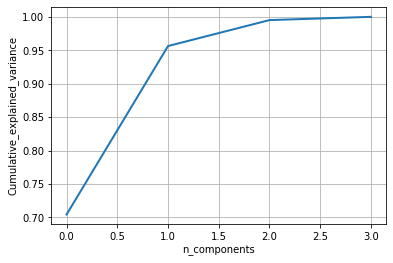

In [11]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
start = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(x_train_scal, y_train)
stop = time.time()
time_100 = stop - start
print(f"Training time: {time_100}s")
score_100 = logisticRegr.score(x_test_scal, y_test)
print("Score:", score_100)

Training time: 0.01200103759765625s
Score: 0.8814814814814815


In [13]:
# Make an instance of the Model
pca_98 = PCA(.98)
pca_98.fit(x_train_scal)
n_98 = pca_98.n_components_ 
print(pca_98.n_components_ )

3


In [15]:
x_train_98 = pca_98.transform(x_train_scal)
x_test_98 = pca_98.transform(x_test_scal)

In [16]:
start_98 = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(x_train_98, y_train)
stop_98 = time.time()
time_98 = stop_98 - start_98
print(f"Training time: {time_98}s")
score_98 = logisticRegr.score(x_test_98, y_test)
print("Score:", score_98)

Training time: 0.012004375457763672s
Score: 0.8814814814814815


In [17]:
# Make an instance of the Model
pca_95 = PCA(.95)
pca_95.fit(x_train)
n_95 = pca_95.n_components_ 
print(pca_95.n_components_ )

2


In [18]:
x_train_95 = pca_95.transform(x_train_scal)
x_test_95 = pca_95.transform(x_test_scal)

In [19]:
start_95 = time.time()
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(x_train_95, y_train)
stop_95 = time.time()
time_95 = stop_95 - start_95
print(f"Training time: {time_95}s")
score_95 = logisticRegr.score(x_test_95, y_test)
print("Score:", score_95)

Training time: 0.021002531051635742s
Score: 0.8592592592592593


In [20]:
pd.DataFrame(data = [[1.00, 4, time_100,score_100],
                     [.98, n_98, time_98, score_98],
                     [.95, n_95, time_95, score_95]],
                     columns = ['Variance Retained',
                      'Number of Components', 
                      'Time (seconds)',
                      'Accuracy'])

,Variance Retained,Number of Components,Time (seconds),Accuracy
0,1.00,4,0.012001,0.881481
1,0.98,3,0.012004,0.881481
2,0.95,2,0.021003,0.859259
